# Model Testing

In [ ]:
df_final_drop2 = df_final_drop.drop('D_R_scale', axis=1)
#drops target column

In [ ]:
X= df_final_drop2
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

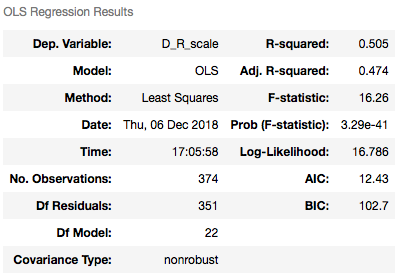

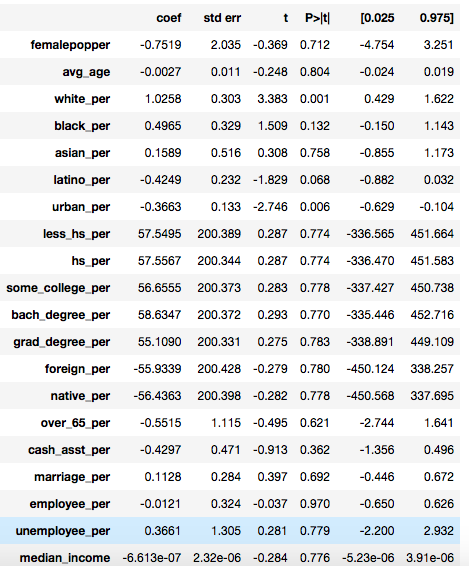

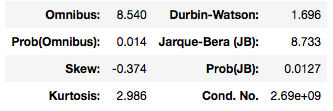

In [ ]:
X= df_final_drop[['white_per', 'urban_per', 'black_per', 'asian_per', 'cash_asst_per', 'grad_degree_per', 'avg_age', 'per_rent', 'native_per', 'latino_per', 'unemployee_per']]
y= df_final_drop['D_R_scale']
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

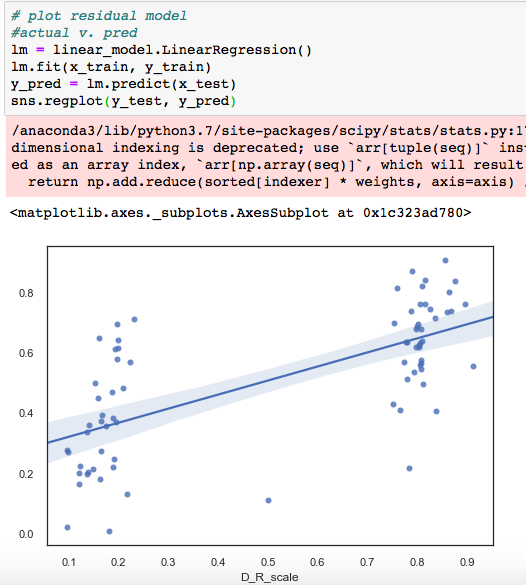

In [ ]:
# Transform features selection to be polynomial. 
# This means that there will be more features to select from. We do this because some features
# don't have a linear relationship with the target variable. We arbitrarily choose degree = 2 polynomial

poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_train = pd.DataFrame(poly.fit_transform(x_train), columns=poly.get_feature_names(x_train.columns))
pd.set_option('display.max_columns', 300)

features_test = pd.DataFrame(poly.fit_transform(x_test), columns=poly.get_feature_names(x_test.columns))
features_train.head()
#multiplied and squared our features against one another

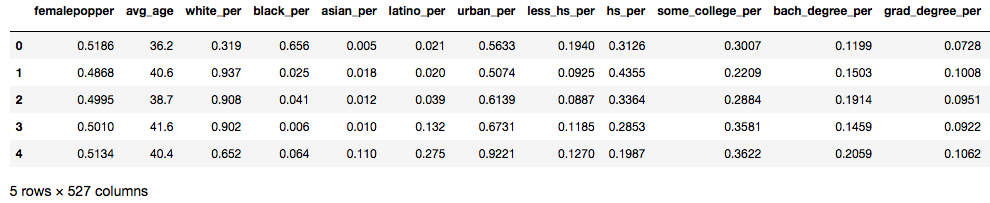

# Wrapper Method

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold

In [ ]:
thresholder = VarianceThreshold(threshold=.5)
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [ ]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [ ]:
features_selected_train = variance_threshold_selector(features_train)

In [ ]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

In [ ]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

In [ ]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [ ]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [ ]:
final_columns = [item[1] for item in rankings[0:15]]

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

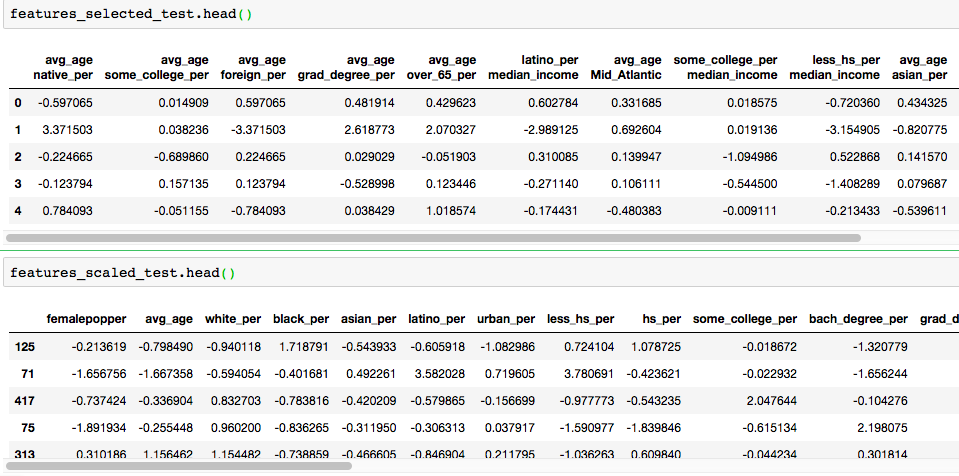

In [ ]:
X= features_selected_train[final_columns]
y= list(y_train)
model = smf.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

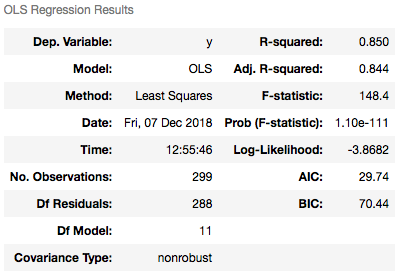

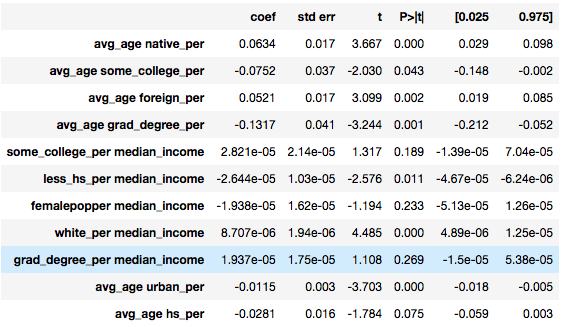

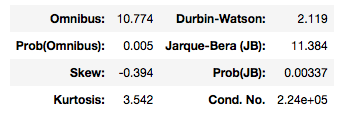

In [ ]:
sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

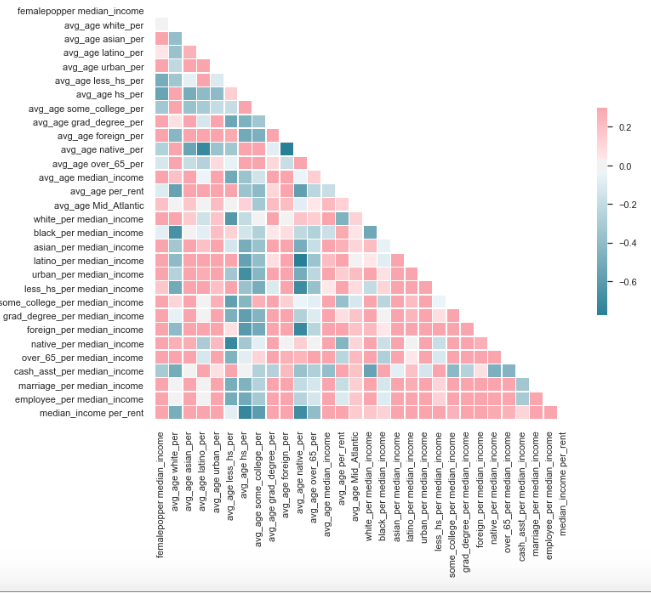

In [ ]:
pairplot = sns.pairplot(features_scaled_test, kind='reg')
pairplot

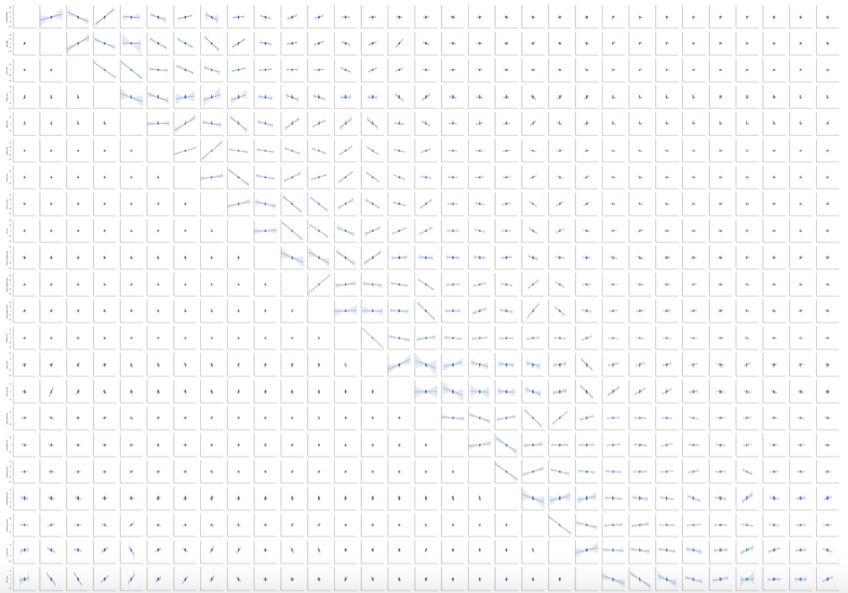

In [ ]:
pd.plotting.scatter_matrix(df_final_drop, figsize=[20,12]);

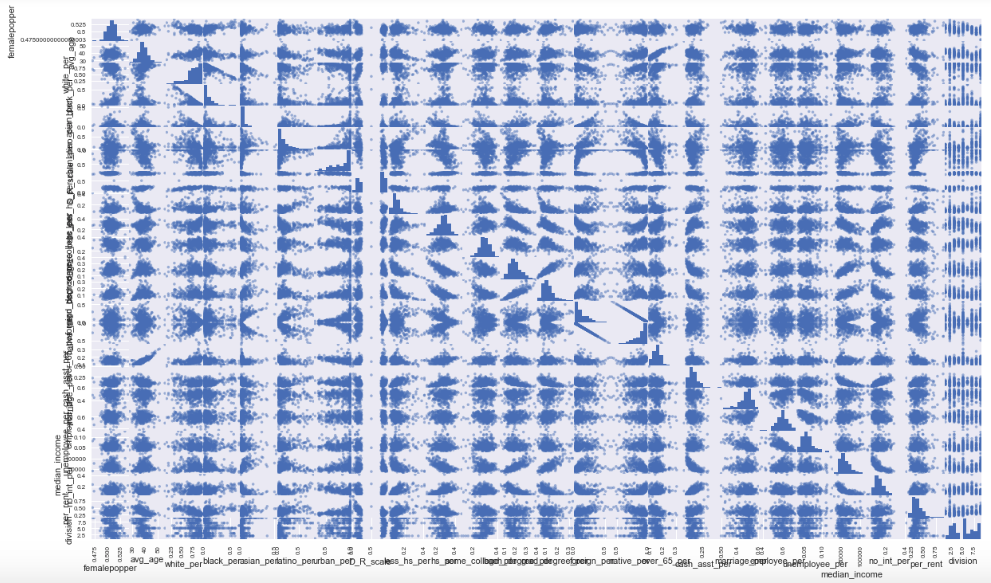

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

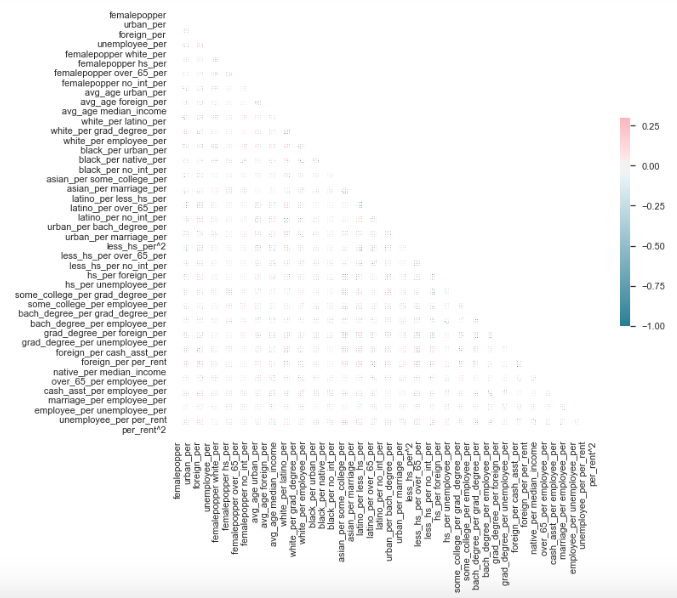

In [ ]:
import matplotlib.pyplot as plt
N = 50
x = df_final_drop3['D_R_scale']
y = df_final_drop3['marriage_per']
colors = np.random.rand(N)
plt.scatter(x, y, alpha=0.5)
plt.show()

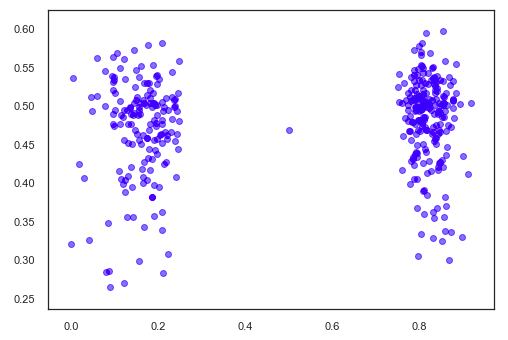